In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import re
from itertools import product

plt.rcParams.update({
    'font.size': 16,          # Base font size
})
bohr_to_angstrom = 0.52917721067

# Path to your repo (adjust this)
repo_path = "/home/x_pamca/postdoc_proj/EMTO_input_automation"

# Add it to sys.path if not already there
if repo_path not in sys.path:
    sys.path.append(repo_path)

#from modules.create_files import create_kstr_input, create_shape_input, create_kgrn_input, create_kfcd_input, create_job_ca, create_job_volume, create_eos_input

from modules.workflows import create_emto_inputs
from modules.eos import compute_equation_of_state, parse_energies
from modules.extract_results import parse_emto_output, save_report, generate_report
from modules.dos import DOSParser, DOSPlotter, plot_dos
from modules.inputs import create_eos_input, parse_eos_output, morse_energy


In [2]:

# Convert to float, replacing asterisks with NaN or a large number
def safe_float_convert(arr):
    """Convert string array to float, handling asterisks."""
    result = []
    for row in arr:
        float_row = []
        for val in row:
            if '*' in val:
                float_row.append(np.nan)  # or 1000.0, or whatever you prefer
            else:
                float_row.append(float(val))
        result.append(float_row)
    return np.array(result)

In [3]:
filename = 'total_up'

with open(filename, 'r') as f:

    dosup = f.readlines()

filename = 'total_down'

with open(filename, 'r') as f:

    dosdown = f.readlines()


dosdown = np.array([i.split() for i in dosdown if i.strip() != ''])
dosup = np.array([i.split() for i in dosup if i.strip() != ''])

totdown = safe_float_convert(dosdown)
totup = safe_float_convert(dosup)

In [9]:
filename = 'pt1_up'

with open(filename, 'r') as f:

    dosup = f.readlines()

filename = 'pt1_down'

with open(filename, 'r') as f:

    dosdown = f.readlines()


dosdown = np.array([i.split() for i in dosdown[4:] if i.strip() != ''])
dosup = np.array([i.split() for i in dosup[4:] if i.strip() != ''])

pt1down = safe_float_convert(dosdown)
pt1up = safe_float_convert(dosup)

In [10]:

filename = 'pt2_up'

with open(filename, 'r') as f:

    dosup = f.readlines()

filename = 'pt2_down'

with open(filename, 'r') as f:

    dosdown = f.readlines()


dosdown = np.array([i.split() for i in dosdown[4:] if i.strip() != ''])
dosup = np.array([i.split() for i in dosup[4:] if i.strip() != ''])

pt2down = safe_float_convert(dosdown)
pt2up = safe_float_convert(dosup)


In [11]:
filename = 'fe1_up'

with open(filename, 'r') as f:

    dosup = f.readlines()

filename = 'fe1_down'

with open(filename, 'r') as f:

    dosdown = f.readlines()


dosdown = np.array([i.split() for i in dosdown[4:] if i.strip() != ''])
dosup = np.array([i.split() for i in dosup[4:] if i.strip() != ''])

fe1down = safe_float_convert(dosdown)
fe1up = safe_float_convert(dosup)

In [12]:
filename = 'fe2_up'

with open(filename, 'r') as f:

    dosup = f.readlines()

filename = 'fe2_down'

with open(filename, 'r') as f:

    dosdown = f.readlines()


dosdown = np.array([i.split() for i in dosdown[4:] if i.strip() != ''])
dosup = np.array([i.split() for i in dosup[4:] if i.strip() != ''])

fe2down = safe_float_convert(dosdown)
fe2up = safe_float_convert(dosup)

In [14]:
dataup = totup
datadown = totdown  

energy_down = datadown[:,0]
energy_up = dataup[:,0]

total_up = dataup[:,1]
total_down =datadown[:,1]

sublat1_up = dataup[:,3]
sublat1_down = datadown[:,3]

sublat2_up = dataup[:,4]
sublat2_down = datadown[:,4]


In [15]:
dataup, datadown = pt1up, pt1down   

ept1_down, ept1_up  = datadown[:,0], dataup[:,0]

pt1_up, pt1_down = dataup[:,1], datadown[:,1]

############################################

dataup, datadown = pt2up, pt2down   

ept2_down, ept2_up  = datadown[:,0], dataup[:,0]

pt2_up, pt2_down = dataup[:,1], datadown[:,1]

############################################

dataup, datadown = fe1up, fe1down   

efe1_down, efe1_up  = datadown[:,0], dataup[:,0]

fe1_up, fe1_down = dataup[:,1], datadown[:,1]

############################################

dataup, datadown = fe2up, fe2down   

efe2_down, efe2_up  = datadown[:,0], dataup[:,0]

fe2_up, fe2_down = dataup[:,1], datadown[:,1]

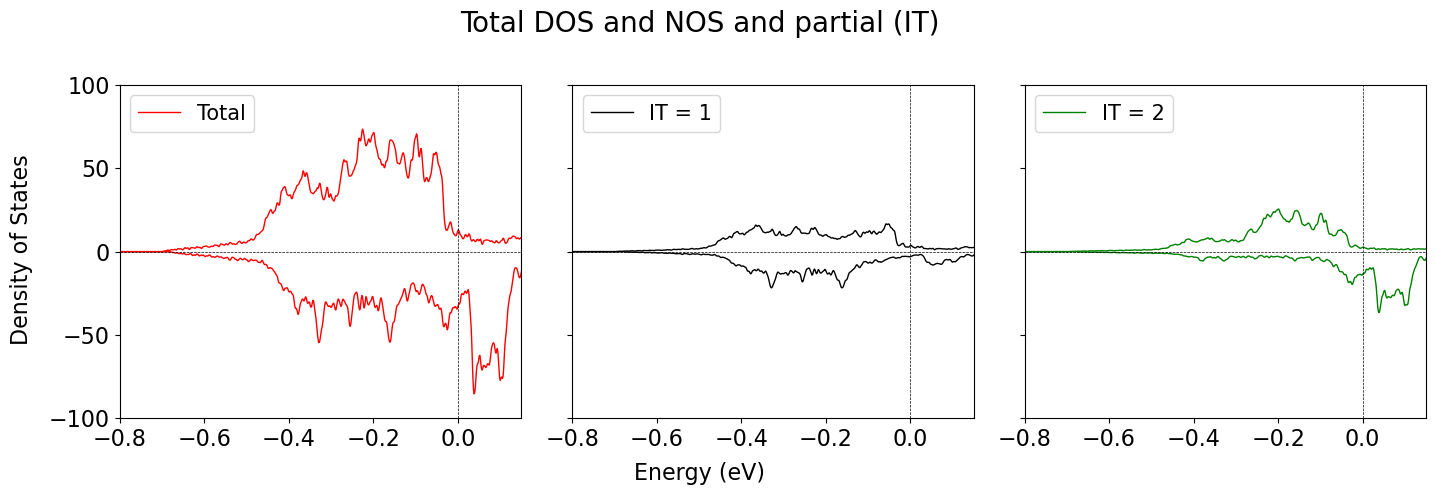

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# --- Subplot 1: Total DOS ---
# Plot total DOS from parser (reference - should match calculated total)
axes[0].plot(energy_up, -1*total_up, 'r-', label='Total', linewidth=1)
axes[0].plot(energy_down, total_down, 'r-', linewidth=1)


axes[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].set_xlim([-0.8, 0.15])
axes[0].set_ylim([-100, 100])
axes[0].legend(fontsize=15)


# --- Subplot 2: PDOS Fe ---
axes[1].plot(energy_up, -1*sublat1_up, 'k-', label='IT = 1', linewidth=1)
axes[1].plot(energy_down, sublat1_down, 'k-', linewidth=1)


axes[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].set_xlim([-0.8, 0.15])
axes[1].legend(fontsize=15)

# --- Subplot 3: PDOS Pt ---
axes[2].plot(energy_up, -1*sublat2_up, 'g-', label='IT = 2', linewidth=1)
axes[2].plot(energy_down, sublat2_down, 'g-', linewidth=1)

axes[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].set_xlim([-0.8, 0.15])
axes[2].legend(fontsize=15)

# Shared labels
fig.text(0.5, 0.04, 'Energy (eV)', ha='center')
fig.text(0.04, 0.5, 'Density of States', va='center', rotation='vertical')

fig.suptitle("Total DOS and NOS and partial (IT)", fontsize=20)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

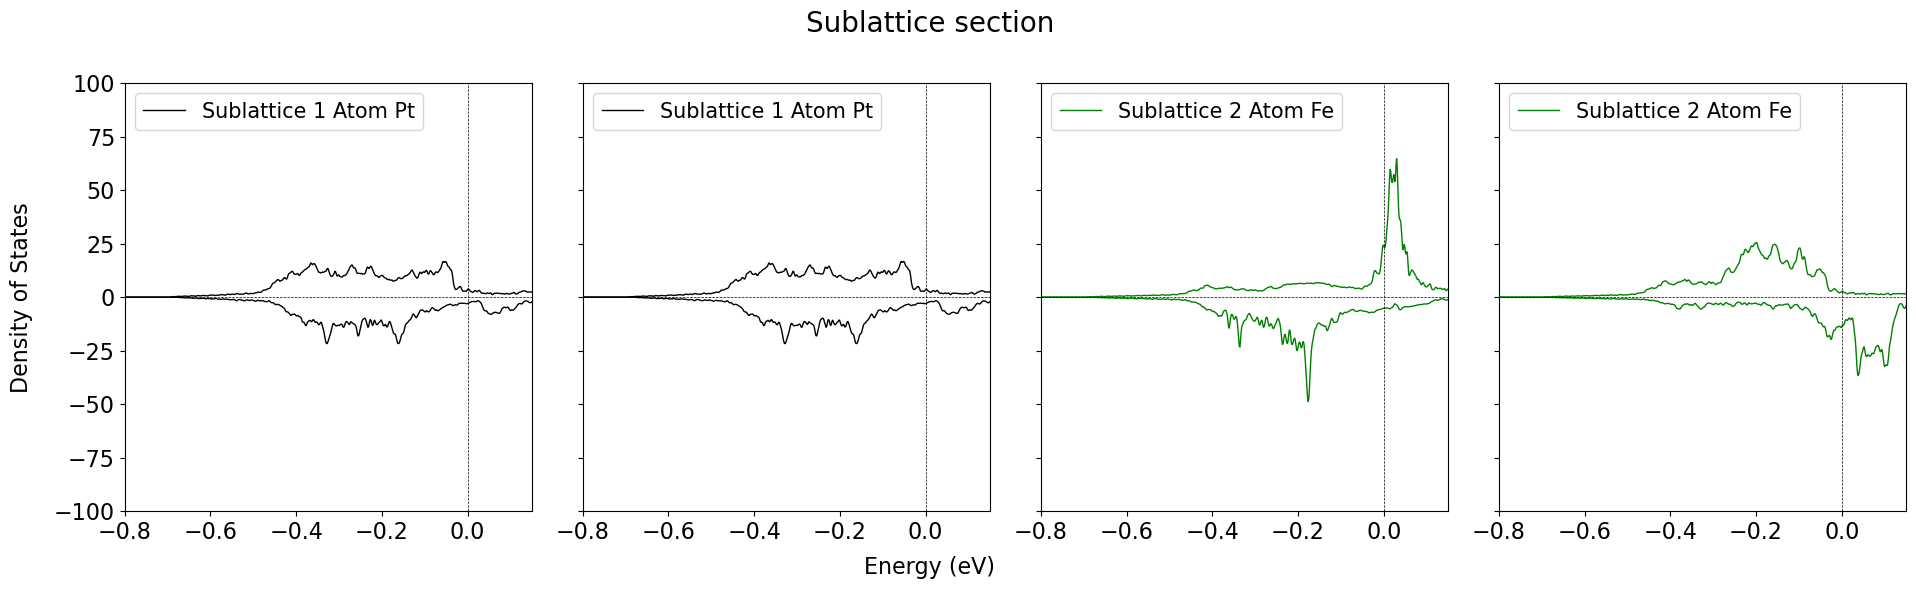

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# --- Subplot 1: Total DOS ---
# Plot total DOS from parser (reference - should match calculated total)
axes[0].plot(ept1_up, -1*pt1_up, 'k-', label='Sublattice 1 Atom Pt', linewidth=1)
axes[0].plot(ept1_down, pt1_down, 'k-', linewidth=1)


axes[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].set_xlim([-0.8, 0.15])
axes[0].set_ylim([-100, 100])
axes[0].legend(fontsize=15)


# --- Subplot 2: PDOS Fe ---
axes[1].plot(ept2_up, -1*pt2_up, 'k-', label='Sublattice 1 Atom Pt', linewidth=1)
axes[1].plot(ept2_down, pt2_down, 'k-', linewidth=1)


axes[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].set_xlim([-0.8, 0.15])
axes[1].legend(fontsize=15)

# --- Subplot 3: PDOS Pt ---
axes[2].plot(efe1_up, -1*fe1_up, 'g-', label='Sublattice 2 Atom Fe', linewidth=1)
axes[2].plot(efe1_down, fe1_down, 'g-', linewidth=1)

axes[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].set_xlim([-0.8, 0.15])
axes[2].legend(fontsize=15)


# --- Subplot 3: PDOS Pt ---
axes[3].plot(efe2_up, -1*fe2_up, 'g-', label='Sublattice 2 Atom Fe', linewidth=1)
axes[3].plot(efe2_down, fe2_down, 'g-', linewidth=1)

axes[3].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[3].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[3].set_xlim([-0.8, 0.15])
axes[3].legend(fontsize=15)

# Shared labels
fig.text(0.5, 0.04, 'Energy (eV)', ha='center')
fig.text(0.04, 0.5, 'Density of States', va='center', rotation='vertical')

fig.suptitle("Sublattice section", fontsize=20)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

In [6]:
dos_file = f'fept_0.96_2.86_k21.dos'

parser = DOSParser(dos_file)
plotter = DOSPlotter(parser)

dos_up, dos_down= parser.get_total_dos()

fe_up, fe_down = parser.get_sublattice_dos(2)
pt_up, pt_down = parser.get_sublattice_dos(1)

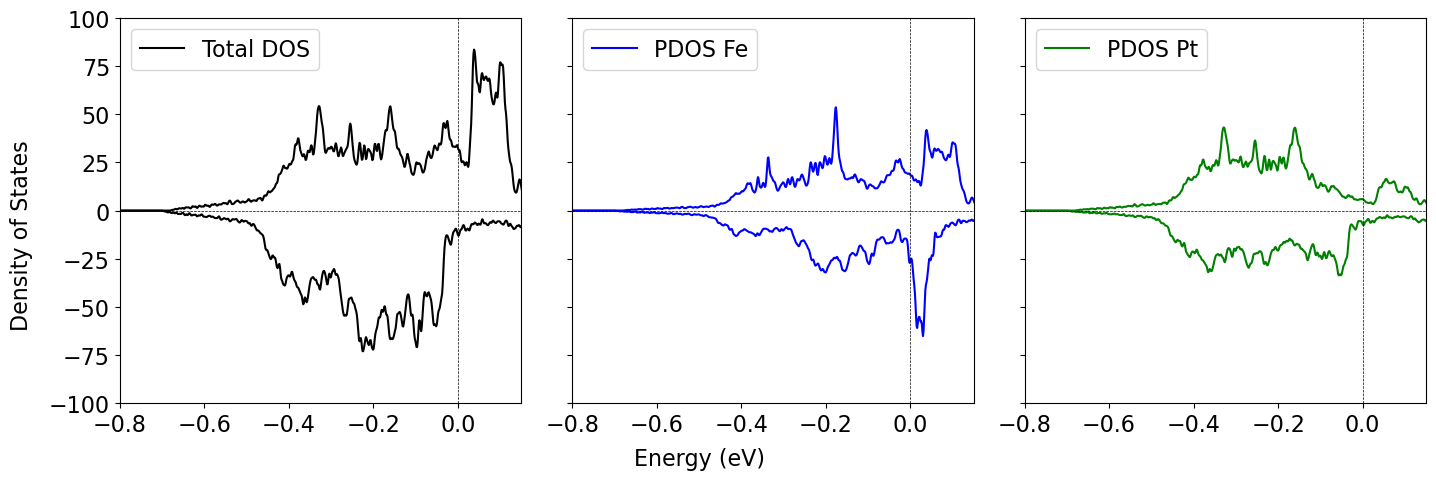

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# --- Subplot 1: Total DOS ---
axes[0].plot(dos_down[:, 0], dos_down[:, 1], 'k')
axes[0].plot(dos_up[:, 0], -1 * dos_up[:, 1], 'k', label='Total DOS')
axes[0].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[0].set_xlim([-0.8, 0.15])
axes[0].set_ylim([-100, 100])
axes[0].legend()

# --- Subplot 2: PDOS Fe ---
axes[1].plot(fe_down[:, 0], fe_down[:, 1], 'b')
axes[1].plot(fe_up[:, 0], -1 * fe_up[:, 1], 'b', label='PDOS Fe')
axes[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[1].set_xlim([-0.8, 0.15])
axes[1].legend()

# --- Subplot 3: PDOS Pt ---
axes[2].plot(pt_down[:, 0], pt_down[:, 1], 'g')
axes[2].plot(pt_up[:, 0], -1 * pt_up[:, 1], 'g', label='PDOS Pt')
axes[2].axhline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].axvline(0, color='black', linewidth=0.5, linestyle='--')
axes[2].set_xlim([-0.8, 0.15])
axes[2].legend()

# Shared labels
fig.text(0.5, 0.04, 'Energy (eV)', ha='center')
fig.text(0.04, 0.5, 'Density of States', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()